<a href="https://colab.research.google.com/github/nickleus27/CST383_SportsData/blob/main/SportsDataNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BitByBit Team: Sports Data Notebook
#### From Data to Win: Bulding Predictive Models for Match Outcomes
<ul>
<li>Nick Anderson</li>
<li>Oscar Ochoa</li>
<li>Juan Duarte</li>
</ul>

<hr>

# Intro

-Football is one of the most popular sports worldwide, that generates a vast amount of interest in betting and selecting winning teams. We will make predictions of which teams will win based on data from previous games results and data.

### Data Description, Preciction Goals, Features as Predictors
<ul>
  <li>
   <b>Data Description:</b>
  <p>
The dataset we are using contains information for the National football League’s bettings odds from 1979 up until 2013. The information in this dataset was collected from websites such as ESPN, NFL, Pro Football reference, while the weather information was collected from NOAA. Some of the information in this dataset includes columns with team scores, the location of the game, the style of the stadium, the weather during game day, and stadium capacity. The information contained in this dataset can help analyze trends to develop better betting strategies. We plan to add more features to the existing features. We can add win and loss columns based on the team’s scores.
  </p>
  </li>
  <li>
  <b>Prediction Goals:</b>
  <p>Using our dataset we aim to build a predictive system for NFL games, this system will estimate the probability of winning or losing between two NFL teams when they face off. We will analyze historical performance, so our model can provide valuable insights into game outcomes.</p>
  </li>
  <li>
  <b>Features as Predictors:</b>
  <p>Our predictive system will use several features to enhance accuracy. We’ll use team scores along with wins and losses , which will provide an overall record for each team. Additionally, we’ll analyze wins against other teams, which will take into consideration the performance between different opponents. Also, we’ll explore the relationship between team wins at home versus away games, along with the weather of the stadium where they games are played. These features together will create great predictors.</p>
  </li>
</ul>

### Add Installs:

In [ ]:
! if test -d ./CST383_SportsData; then \
echo "Data directory already exists"; \
else \
echo "Cloning data directory"; \
git clone https://github.com/nickleus27/CST383_SportsData.git; \
fi

Data directory already exists


### Add Imports:



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# add needed imports here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import graphviz


# Defaults for Graphs

In [ ]:
sns.set_context('talk')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12, 8)

### Read Data:

In [ ]:
df = pd.read_csv("CST383_SportsData/archive/spreadspoke_scores.csv")
# add more data here
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


## Overview of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13800 entries, 0 to 13799
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13800 non-null  object 
 1   schedule_season      13800 non-null  int64  
 2   schedule_week        13800 non-null  object 
 3   schedule_playoff     13800 non-null  bool   
 4   team_home            13800 non-null  object 
 5   score_home           13798 non-null  float64
 6   score_away           13798 non-null  float64
 7   team_away            13800 non-null  object 
 8   team_favorite_id     11319 non-null  object 
 9   spread_favorite      11319 non-null  float64
 10  over_under_line      11309 non-null  object 
 11  stadium              13800 non-null  object 
 12  stadium_neutral      13800 non-null  bool   
 13  weather_temperature  12420 non-null  float64
 14  weather_wind_mph     12404 non-null  float64
 15  weather_humidity     8474 non-null  

In [ ]:
df.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,13800.000000,13798.000000,13798.000000,11319.000000,12420.000000,12404.000000,8474.000000
mean,1996.636884,22.479852,19.797000,-5.373134,58.931320,7.625524,67.211824
std,16.427953,10.523645,10.153181,3.439071,15.536523,5.713945,15.796313
min,1966.000000,0.000000,0.000000,-26.500000,-6.000000,0.000000,4.000000
25%,1983.000000,15.000000,13.000000,-7.000000,48.000000,2.000000,57.000000
50%,1998.000000,22.000000,20.000000,-4.500000,62.000000,8.000000,69.000000
75%,2011.000000,29.000000,27.000000,-3.000000,72.000000,11.000000,79.000000
max,2023.000000,72.000000,62.000000,0.000000,97.000000,40.000000,100.000000


# Data Wrangling Prep
- **Convert schedule_date** to datetime
- **score_home, score_away** 2 missing data values
- **weather detail** lots of missing values
- **weather_humidity** missing data
- **weather_temperature** missing data
- **weather_wind_mph** missing data
- **over_under_line** missing data
- **spread_favorite** missing data
- **team_favorite** missing data

<hr>


### Covert datetime

In [ ]:
df['schedule_date'] = pd.to_datetime(df['schedule_date'], format='%m/%d/%Y')
df['schedule_date']

0       1966-09-02
1       1966-09-03
2       1966-09-04
3       1966-09-09
4       1966-09-10
           ...    
13795   2024-01-20
13796   2024-01-21
13797   2024-01-21
13798   2024-01-28
13799   2024-01-28
Name: schedule_date, Length: 13800, dtype: datetime64[ns]

### score_home & score_away

In [ ]:
# Drop score rows with NaN
# dropping NaN in score_home should also take care of NaN score_away
df = df.iloc[df.score_home.dropna(axis=0).index]
pd.isna(df.score_away).sum()

0

## Manufacture Features

The First step we need to consider to have a realistic model is to drop old data from the data frame. Teams from the past should not have an influence on the odds of current teams winning or losing. So we will drop data before year 2010. This is an area we could continue to experiment with to find optimal results.

<hr>

In [ ]:
# drop old seasons. keep data only since 2010 to keep data from current team
df = df[df.schedule_season > 2010]
df.reset_index(drop=True, inplace=True)
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,2011-09-08,2011,1,False,Green Bay Packers,42.0,34.0,New Orleans Saints,GB,-5.0,48,Lambeau Field,False,68.0,5.0,67.0,NaN
1,2011-09-11,2011,1,False,Arizona Cardinals,28.0,21.0,Carolina Panthers,ARI,-7.0,37.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
2,2011-09-11,2011,1,False,Baltimore Ravens,35.0,7.0,Pittsburgh Steelers,BAL,-1.5,37,M&T Bank Stadium,False,75.0,2.0,71.0,rain
3,2011-09-11,2011,1,False,Chicago Bears,30.0,12.0,Atlanta Falcons,ATL,-1.5,41,Soldier Field,False,78.0,7.0,57.0,NaN
4,2011-09-11,2011,1,False,Cleveland Browns,17.0,27.0,Cincinnati Bengals,CLE,-7.0,36.5,FirstEnergy Stadium,False,72.0,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2024-01-15,2023,Wildcard,True,Tampa Bay Buccaneers,32.0,9.0,Philadelphia Eagles,PHI,-3.0,43,Raymond James Stadium,False,65.0,2.0,90.0,NaN
3519,2024-01-20,2023,Division,True,Baltimore Ravens,34.0,10.0,Houston Texans,BAL,-9.5,43.5,M&T Bank Stadium,False,27.0,16.0,40.0,NaN
3520,2024-01-20,2023,Division,True,San Francisco 49ers,24.0,21.0,Green Bay Packers,SF,-10.0,50.5,Levi's Stadium,False,59.0,8.0,77.0,NaN
3521,2024-01-21,2023,Division,True,Buffalo Bills,24.0,27.0,Kansas City Chiefs,BUF,-2.5,45.5,Highmark Stadium,False,25.0,11.0,67.0,NaN


Lets turn the teams scores into a column for wins and a column for losses. With this data feature we can continue to build features of teams win/loss ratios against other teams.

In [ ]:
# add column for which teams won
def apply_fn(x):
  if x.score_home == x.score_away:
    return "Tie"
  elif  x.score_home > x.score_away:
    return x.team_home
  else:
    return x.team_away
df["winning_team"] = df.apply(apply_fn, axis=1)

In [ ]:
# add column for which teams lost
def apply_fn(x):
  if x.score_home == x.score_away:
    return "Tie"
  elif  x.score_home > x.score_away:
    return x.team_away
  else:
    return x.team_home
df["losing_team"] = df.apply(apply_fn, axis=1)

Before realizing we should drop old data (not current seasons), we converted teams who had changed there name to all have the teams current name. We kept this in place even though it might not apply to all the current data. But it will still apply to recent team name changes, such as, the Raiders.
### Questions?:

--- what should we do about teams that dont exist any more?

* ~~Oilers (drop?)~~
* ~~looks like oilers could be combined with current teams: [wikipedia oilers](https://en.wikipedia.org/wiki/Houston_Oilers)~~
* added previous team names to current

--- what should we do about teams that have moved?
* ~~Raiders [LA, Oakland, Vegas] (combine?)~~
* combined teams

--- teams that changed names?
* ~~Washing Footbal Team, Commanders ?~~
* combined teams

There could be more...

In [ ]:
cols_to_replace = ['winning_team', 'team_home', 'team_away', 'losing_team']
teams_to_replace = {'Oilers': 'Tennessee Titans', 'Raiders': "Las Vegas Raiders", 'Redskins': 'Washington Commanders', 'Football': 'Washington Commanders', "Colts": "Indianapolis Colts", 'Patriots': "New England Patriots", "Cardinals": "Arizona Cardinals", "Chargers": "Los Angeles Chargers", "Rams": "Los Angeles Rams"}

In [ ]:
def replace_teams(data, cols, teams):
    for col in cols:
        for old_name, new_name in teams.items():
            mask = data[col].str.contains(old_name, case=False, na=False)
            data.loc[mask, col] = new_name
            print(f'Replaced {old_name} with {new_name} in {col}')
    return data
df = replace_teams(df, cols=cols_to_replace, teams=teams_to_replace)

Replaced Oilers with Tennessee Titans in winning_team
Replaced Raiders with Las Vegas Raiders in winning_team
Replaced Redskins with Washington Commanders in winning_team
Replaced Football with Washington Commanders in winning_team
Replaced Colts with Indianapolis Colts in winning_team
Replaced Patriots with New England Patriots in winning_team
Replaced Cardinals with Arizona Cardinals in winning_team
Replaced Chargers with Los Angeles Chargers in winning_team
Replaced Rams with Los Angeles Rams in winning_team
Replaced Oilers with Tennessee Titans in team_home
Replaced Raiders with Las Vegas Raiders in team_home
Replaced Redskins with Washington Commanders in team_home
Replaced Football with Washington Commanders in team_home
Replaced Colts with Indianapolis Colts in team_home
Replaced Patriots with New England Patriots in team_home
Replaced Cardinals with Arizona Cardinals in team_home
Replaced Chargers with Los Angeles Chargers in team_home
Replaced Rams with Los Angeles Rams in tea

Lets take a look at how teams look as far as total wins. Lets get an idea from the data what teams we can expect to win often.

Text(0.5, 0, 'Wins')

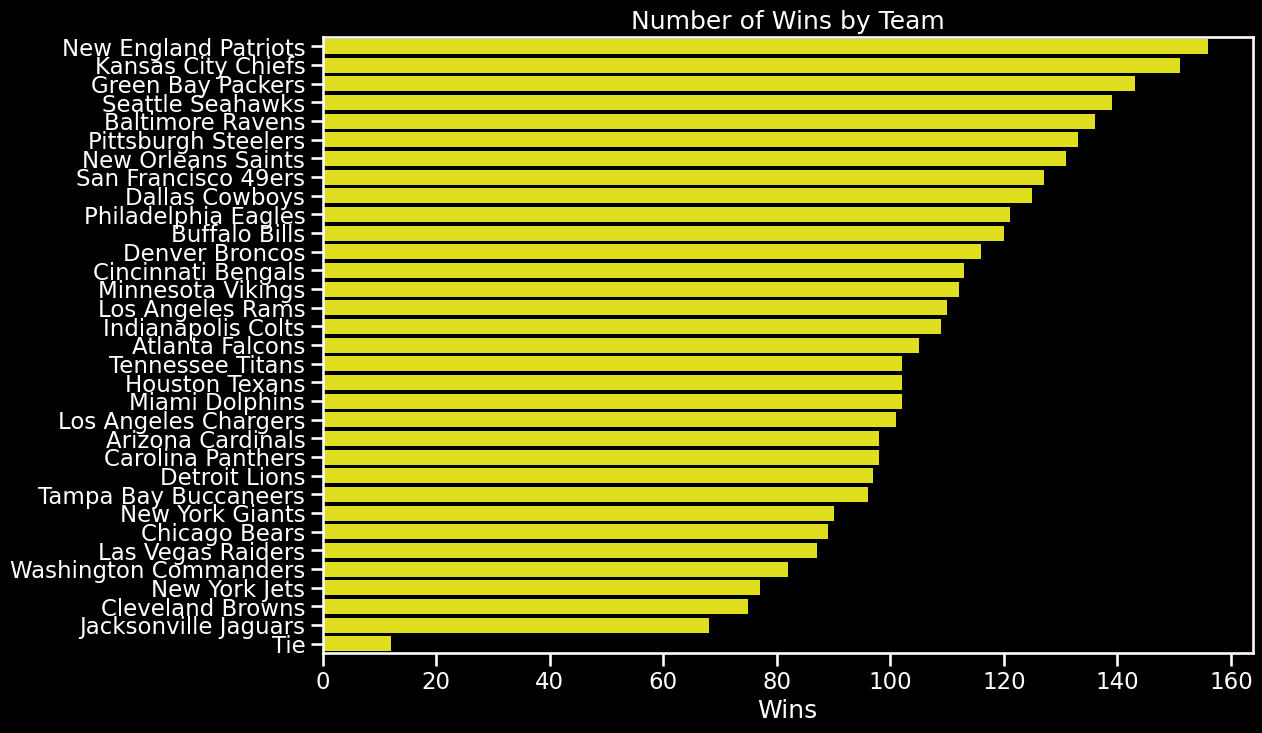

In [ ]:
# plot which how many times each team won
df['winning_team'].value_counts()
sns.barplot(df['winning_team'].value_counts(), orient='h', color='yellow')
plt.title("Number of Wins by Team")
plt.xlabel("Wins")

Before we forget and move on, let try to mangle some of the data with missing values to make it usable

In [ ]:
# filling in nans with mean
weather_mask = df['weather_temperature'].isna()
weather_wind_mask = df['weather_wind_mph'].isna()

weather_wind_mean = df['weather_wind_mph'].mean()
weather_mean = df['weather_temperature'].mean()

df.loc[weather_mask, "weather_temperature"] = weather_mean
df.loc[weather_wind_mask, 'weather_wind_mph'] = weather_wind_mean

Lets add one hot encoding for each team. That way we can keep track of what teams played in each row in a numerical format instead of a categorical format.

In [ ]:
teams = df.team_home.unique()
oneHotTeams = pd.DataFrame(np.full((df.team_home.size, teams.size), -1.0), columns=teams)
df = pd.concat([df, oneHotTeams], axis=1)
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,New England Patriots,New Orleans Saints,Pittsburgh Steelers,Tennessee Titans,New York Giants,Cincinnati Bengals,Las Vegas Raiders,Philadelphia Eagles,Seattle Seahawks,Dallas Cowboys
0,2011-09-08,2011,1,False,Green Bay Packers,42.0,34.0,New Orleans Saints,GB,-5.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2011-09-11,2011,1,False,Arizona Cardinals,28.0,21.0,Carolina Panthers,ARI,-7.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2011-09-11,2011,1,False,Baltimore Ravens,35.0,7.0,Pittsburgh Steelers,BAL,-1.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2011-09-11,2011,1,False,Chicago Bears,30.0,12.0,Atlanta Falcons,ATL,-1.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2011-09-11,2011,1,False,Cleveland Browns,17.0,27.0,Cincinnati Bengals,CLE,-7.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2024-01-15,2023,Wildcard,True,Tampa Bay Buccaneers,32.0,9.0,Philadelphia Eagles,PHI,-3.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3519,2024-01-20,2023,Division,True,Baltimore Ravens,34.0,10.0,Houston Texans,BAL,-9.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3520,2024-01-20,2023,Division,True,San Francisco 49ers,24.0,21.0,Green Bay Packers,SF,-10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3521,2024-01-21,2023,Division,True,Buffalo Bills,24.0,27.0,Kansas City Chiefs,BUF,-2.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
# One hot encoding goes here
for row in range(df.shape[0]):
  winner = df.loc[row, 'winning_team']
  loser = df.loc[row, 'losing_team']
  if winner == 'Tie' or loser == 'Tie':
    home = df.loc[row, 'team_home']
    away = df.loc[row, 'team_away']
    df.loc[row, home] = 0.5
    df.loc[row, away] = 0.5
  else:
    df.loc[row, winner] = 1
    df.loc[row, loser] = 0
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,New England Patriots,New Orleans Saints,Pittsburgh Steelers,Tennessee Titans,New York Giants,Cincinnati Bengals,Las Vegas Raiders,Philadelphia Eagles,Seattle Seahawks,Dallas Cowboys
0,2011-09-08,2011,1,False,Green Bay Packers,42.0,34.0,New Orleans Saints,GB,-5.0,...,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2011-09-11,2011,1,False,Arizona Cardinals,28.0,21.0,Carolina Panthers,ARI,-7.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2011-09-11,2011,1,False,Baltimore Ravens,35.0,7.0,Pittsburgh Steelers,BAL,-1.5,...,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2011-09-11,2011,1,False,Chicago Bears,30.0,12.0,Atlanta Falcons,ATL,-1.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2011-09-11,2011,1,False,Cleveland Browns,17.0,27.0,Cincinnati Bengals,CLE,-7.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2024-01-15,2023,Wildcard,True,Tampa Bay Buccaneers,32.0,9.0,Philadelphia Eagles,PHI,-3.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3519,2024-01-20,2023,Division,True,Baltimore Ravens,34.0,10.0,Houston Texans,BAL,-9.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3520,2024-01-20,2023,Division,True,San Francisco 49ers,24.0,21.0,Green Bay Packers,SF,-10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3521,2024-01-21,2023,Division,True,Buffalo Bills,24.0,27.0,Kansas City Chiefs,BUF,-2.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Visualizations & Plots
<hr>
Lets get an idea if it matters if a team is playing away or at home. Maybe it could help us in determine if a team will win or not.


([<matplotlib.axis.XTick at 0x79fe72aaca90>,
 [Text(0, 0, 'Away'), Text(1, 0, 'Home')])

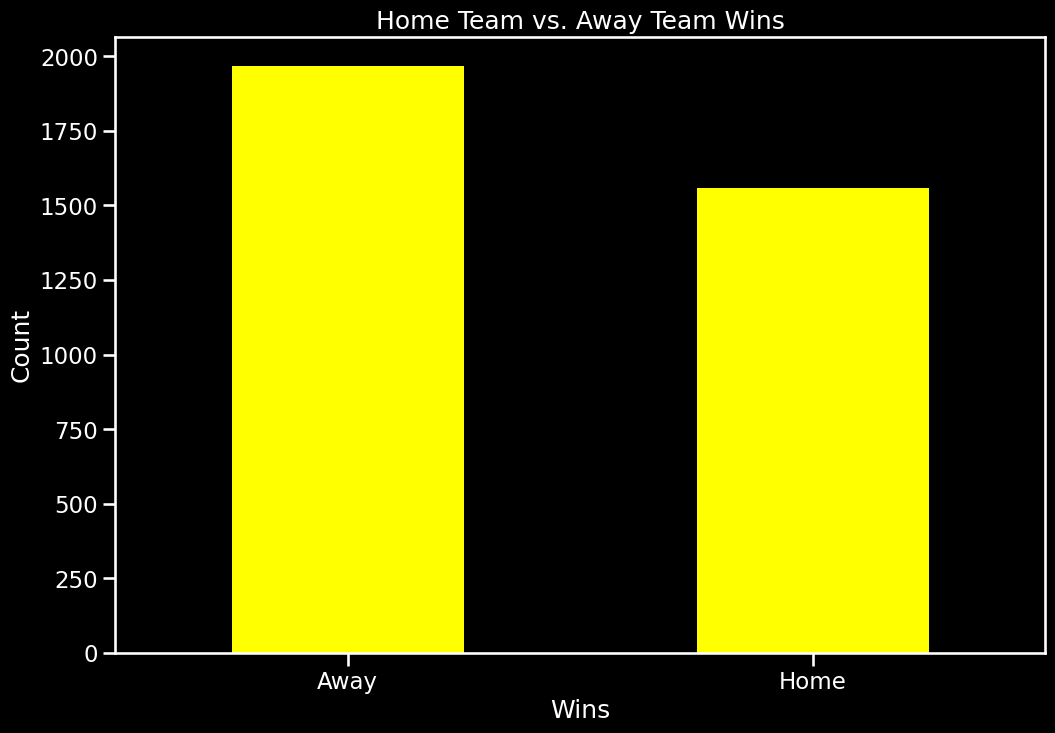

In [ ]:
# Home vs Away Scores/Wins
df['home_score_greater'] = df['score_home'] > df['score_away']
score_comparison_counts = (df['home_score_greater']).value_counts()
score_comparison_counts.plot(kind='bar', color='yellow')
plt.title("Home Team vs. Away Team Wins")
plt.xlabel("Wins")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Away", "Home"], rotation=0)

# Invidual Teams Wins at Home vs Losses at Home

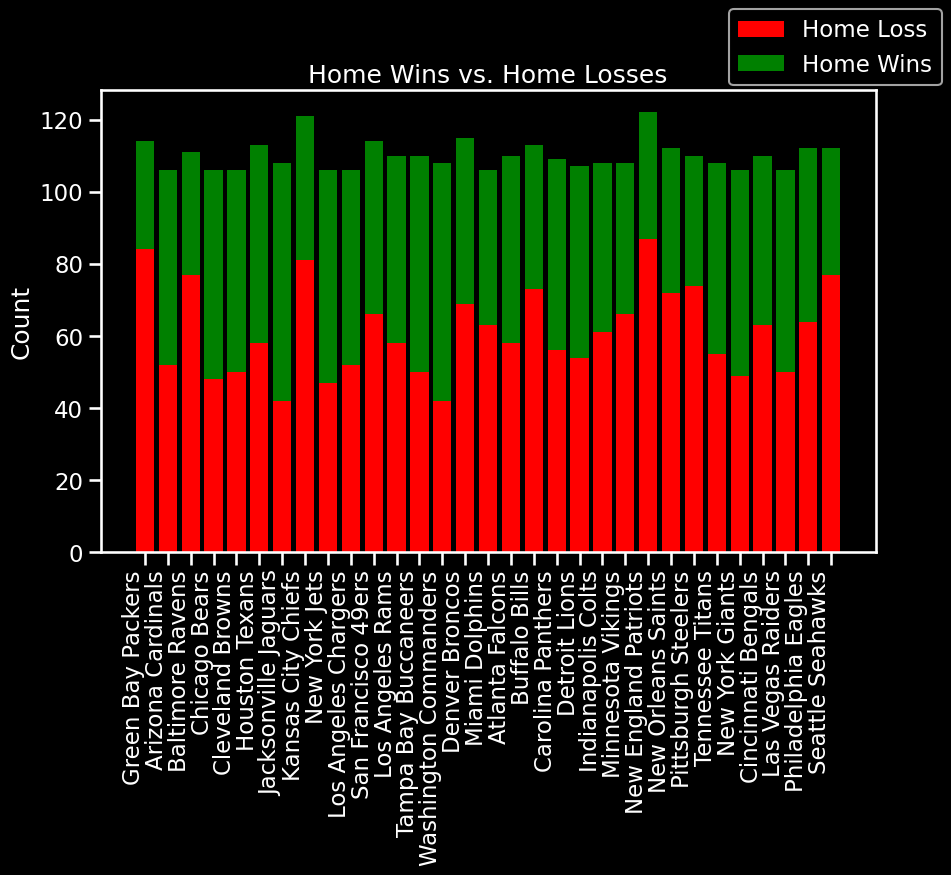

In [ ]:
team_names = df.columns[19:-2].tolist()

home_wins = {}
home_loss = {}

for team in team_names:
    dfh = df[df['team_home'] == team]
    home_wins[team] = dfh['score_home'] > dfh['score_away']
    home_loss[team] = ~home_wins[team]

plt.figure(figsize=(10, 6))

plt.bar(team_names, [home_wins[team].sum() for team in team_names], label='Home Loss', color='red')
plt.bar(team_names, [home_loss[team].sum() for team in team_names], bottom=[home_wins[team].sum() for team in team_names], label='Home Wins', color='green')

plt.title("Home Wins vs. Home Losses")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')
plt.legend(bbox_to_anchor=(1.1, 1.2), loc='upper right')


# Invidual Teams Wins Away vs Losses Away

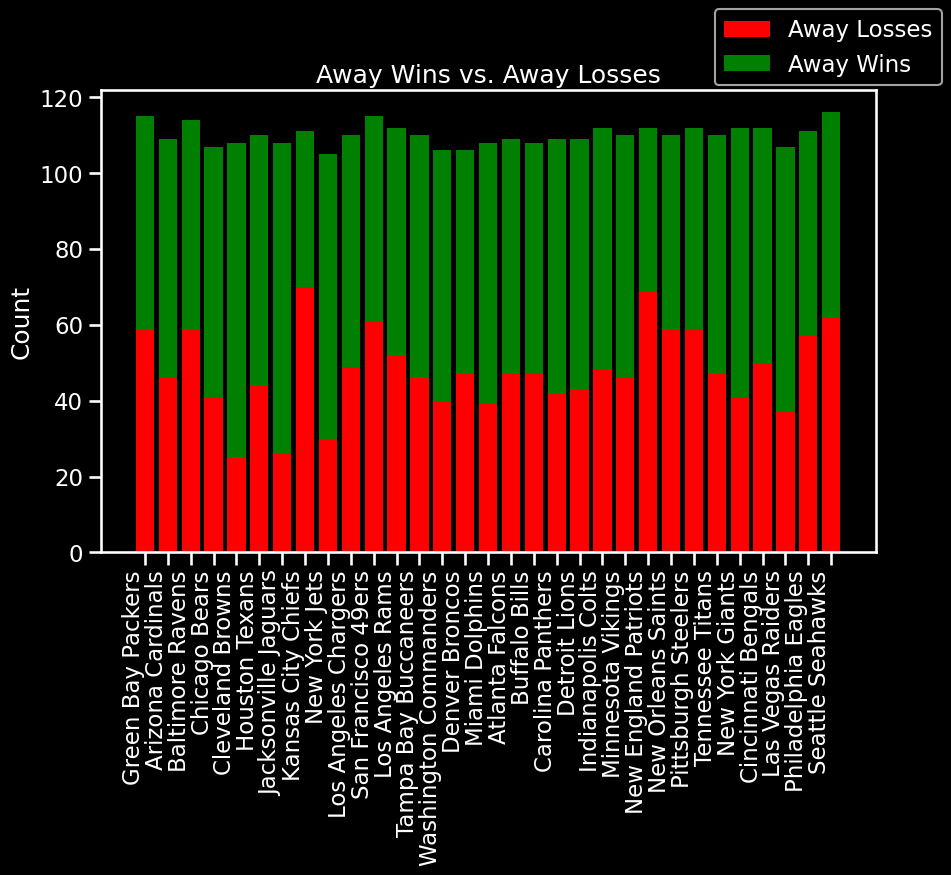

In [ ]:
away_wins = {}
away_loss = {}

for team in team_names:
    dfh = df[df['team_away'] == team]
    away_wins[team] = dfh['score_home'] < dfh['score_away']
    away_loss[team] = ~away_wins[team]

plt.figure(figsize=(10, 6))
plt.bar(team_names, [away_wins[team].sum() for team in team_names], label='Away Losses', color='red')
plt.bar(team_names, [away_loss[team].sum() for team in team_names], bottom=[away_wins[team].sum() for team in team_names], label='Away Wins', color='green')

plt.title("Away Wins vs. Away Losses")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')
plt.legend(bbox_to_anchor=(1.1, 1.2), loc='upper right')

<Axes: >

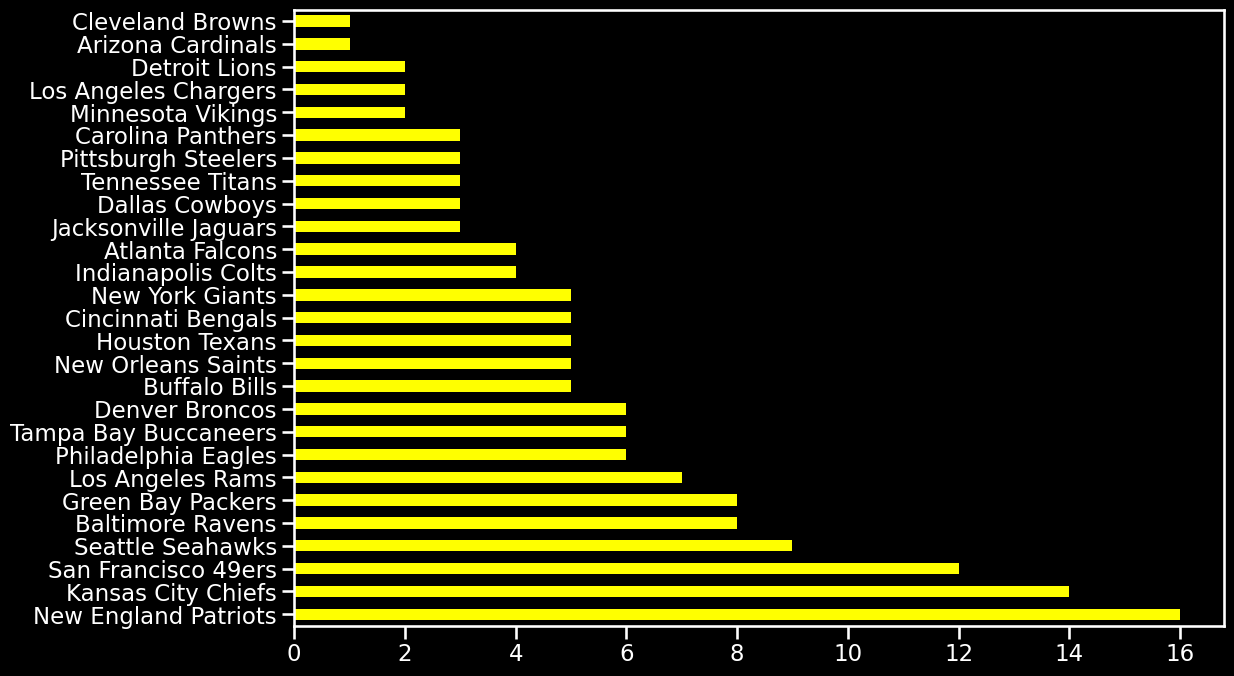

In [ ]:
df[df.schedule_playoff]['winning_team'].value_counts().plot.barh(color='yellow')

<Axes: xlabel='count', ylabel='winning_team'>

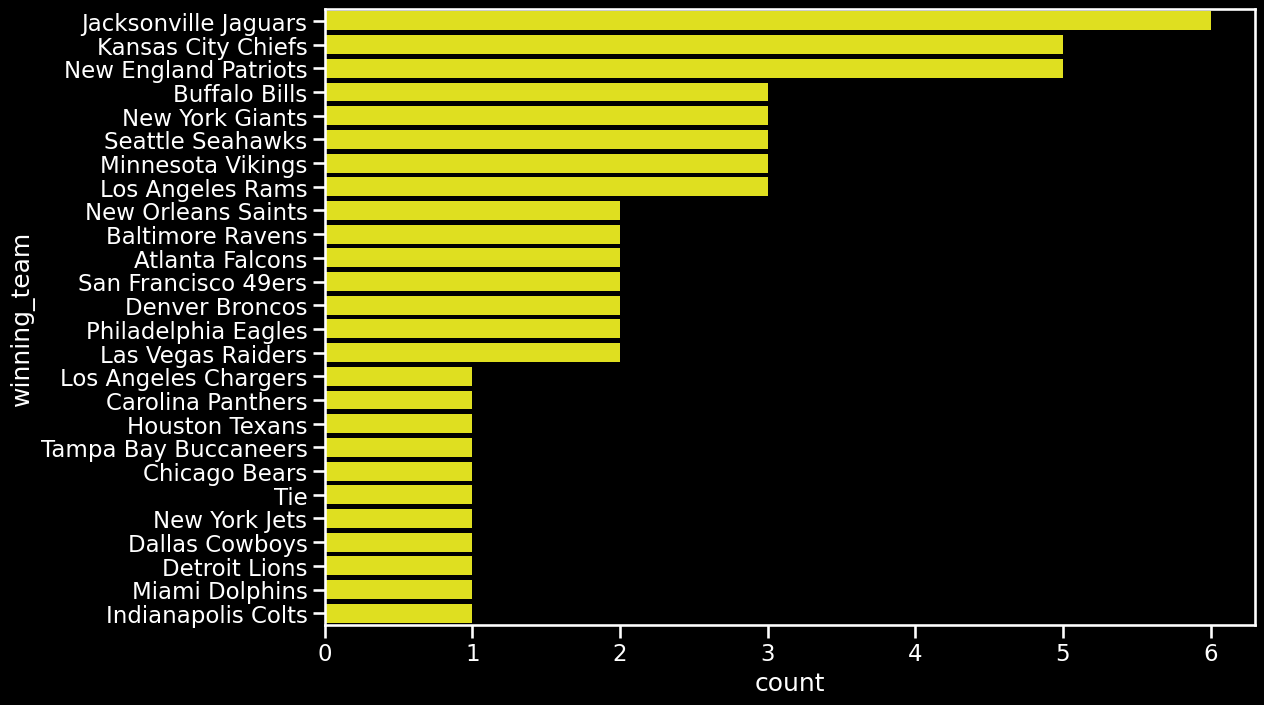

In [ ]:
neatrual_mask = df['stadium_neutral'] == True
wins_on_neatrual = df[neatrual_mask]['winning_team']
win_counts = wins_on_neatrual.value_counts().sort_values(ascending=False)
sorted_teams = win_counts.index

sns.countplot(y=wins_on_neatrual, order=sorted_teams, color='yellow')

# Feature Building
Lets try to build features that will help us make predictions. We think the percentage a team wins or loses against another team could help us make predictions. Here we will build the aforementioned feature.

In [ ]:
team_names = df.columns[19:-1].tolist()
team_names

['Green Bay Packers',
 'Arizona Cardinals',
 'Baltimore Ravens',
 'Chicago Bears',
 'Cleveland Browns',
 'Houston Texans',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'New York Jets',
 'Los Angeles Chargers',
 'San Francisco 49ers',
 'Los Angeles Rams',
 'Tampa Bay Buccaneers',
 'Washington Commanders',
 'Denver Broncos',
 'Miami Dolphins',
 'Atlanta Falcons',
 'Buffalo Bills',
 'Carolina Panthers',
 'Detroit Lions',
 'Indianapolis Colts',
 'Minnesota Vikings',
 'New England Patriots',
 'New Orleans Saints',
 'Pittsburgh Steelers',
 'Tennessee Titans',
 'New York Giants',
 'Cincinnati Bengals',
 'Las Vegas Raiders',
 'Philadelphia Eagles',
 'Seattle Seahawks',
 'Dallas Cowboys']

In [ ]:
def wins_losses_per_team(df, list_teams):
  # loop through each team
  for x, team in enumerate(list_teams):
    # Make sure to grab all games not just home or away
    team_home = df['team_home'] == team
    team_away = df['team_away'] == team

    # Add team to list
    team_wins_losses['Team'].append(team)
    team_losses["Team"].append(team)
    for y, against in enumerate(list_teams):
      # Loop through all other teams and calculate amount of wins
      if ( y <= 32):
        wins = (df.loc[team_home | team_away, list_teams[y]] == 1).sum()
        losses = (df.loc[team_home | team_away, list_teams[y]] == 0).sum()

        team_wins_losses["Wins"].append(wins) # Append wins in order of list
        team_wins_losses["Against"].append(against) # Appends team in order of list

        team_losses['Losses'].append(losses)
        team_losses['Against'].append(against)

In [ ]:
team_wins_losses = {'Team': [], "Wins": [], "Against": []}
team_losses = {'Team': [], 'Losses':[], 'Against': []}
wins_losses_per_team(df, team_names)

In [ ]:
# Converting the wins list into 32 seperate list of win and loss records for
# each team
wins_per_team = [team_wins_losses['Wins'][i : i + 32] for i in range(0, len(team_wins_losses['Wins']), 32)]
against_teams = [team_wins_losses['Against'][i : i + 32] for i in range(0, len(team_wins_losses["Against"]), 32)]

losses_per_team = [team_losses['Losses'][i : i + 32] for i in range(0, len(team_losses["Losses"]), 32)]
against_teams_losses = [team_losses['Against'][i : i + 32] for i in range(0, len(team_losses["Against"]), 32)]

In [ ]:
team_wins_losses["Wins"] = wins_per_team
team_wins_losses["Against"] = against_teams

team_losses['Losses'] = losses_per_team
team_losses['Against'] = against_teams_losses

In [ ]:
data = []

for team_idx, team in enumerate(team_wins_losses["Team"]):
  # Loop through entire list of teams
    wins = team_wins_losses["Wins"][team_idx] # Set wins to entire list of wins
    opponents = team_wins_losses["Against"][team_idx] # set opponents to entire opponent list
    for win, opponent in zip(wins, opponents):
      # append a dictionary to data for each team, their oppponents, and their wins against oppoents
        data.append({"Team": team, "Opponent": opponent, "Wins": win})

# convert to dataframe
team_df = pd.DataFrame(data)



In [ ]:
data_losses = []
for team_idx, team in enumerate(team_losses['Team']):
  losses = team_losses["Losses"][team_idx]
  opponents = team_losses["Against"][team_idx]
  for loss, opponent in zip(losses, opponents):
    data_losses.append({"Team": team, "Opponent": opponent, "Losses": loss})

team_loss_df = pd.DataFrame(data_losses)

In [ ]:
team_df.head(n=5)

,Team,Opponent,Wins
0,Green Bay Packers,Green Bay Packers,143
1,Green Bay Packers,Arizona Cardinals,3
2,Green Bay Packers,Baltimore Ravens,1
3,Green Bay Packers,Chicago Bears,3
4,Green Bay Packers,Cleveland Browns,0


In [ ]:
# Convert data into wide format
team_df = team_df.pivot(index="Team", columns="Opponent", values="Wins")

In [ ]:
team_df.reset_index(inplace=True)
team_df.head()

Opponent,Team,Arizona Cardinals,Atlanta Falcons,Baltimore Ravens,Buffalo Bills,Carolina Panthers,Chicago Bears,Cincinnati Bengals,Cleveland Browns,Dallas Cowboys,...,New Orleans Saints,New York Giants,New York Jets,Philadelphia Eagles,Pittsburgh Steelers,San Francisco 49ers,Seattle Seahawks,Tampa Bay Buccaneers,Tennessee Titans,Washington Commanders
0,Arizona Cardinals,98,5,3,2,6,3,2,1,1,...,3,2,1,3,3,13,16,2,0,4
1,Atlanta Falcons,3,105,3,2,10,4,3,2,3,...,17,2,1,4,3,4,4,13,2,3
2,Baltimore Ravens,1,0,136,3,1,2,13,7,1,...,1,2,1,1,14,1,2,0,4,2
3,Buffalo Bills,1,1,3,120,1,1,6,2,1,...,2,2,11,3,3,1,2,2,4,1
4,Carolina Panthers,3,16,2,2,98,5,1,2,3,...,16,3,0,3,3,3,8,13,2,3


In [ ]:
team_losses_df = team_loss_df.pivot(index="Team", columns="Opponent", values="Losses")

In [ ]:
team_losses_df.reset_index(inplace=True)
team_losses_df.head()

Opponent,Team,Arizona Cardinals,Atlanta Falcons,Baltimore Ravens,Buffalo Bills,Carolina Panthers,Chicago Bears,Cincinnati Bengals,Cleveland Browns,Dallas Cowboys,...,New Orleans Saints,New York Giants,New York Jets,Philadelphia Eagles,Pittsburgh Steelers,San Francisco 49ers,Seattle Seahawks,Tampa Bay Buccaneers,Tennessee Titans,Washington Commanders
0,Arizona Cardinals,115,3,1,1,3,2,2,4,5,...,2,4,2,6,1,13,9,3,3,3
1,Atlanta Falcons,5,114,0,1,16,2,0,1,3,...,9,4,3,4,0,3,5,13,2,4
2,Baltimore Ravens,3,3,89,3,2,1,14,19,2,...,2,2,4,2,13,4,2,3,4,1
3,Buffalo Bills,2,2,3,101,2,2,2,4,3,...,1,2,15,1,4,2,1,2,4,4
4,Carolina Panthers,6,10,1,1,119,1,1,1,2,...,11,3,3,3,0,3,3,13,2,5


In [ ]:
team_names = team_df.columns[1:]

In [ ]:
total_games_df = team_df.loc[:, team_names] + team_losses_df.loc[:, team_names]

In [ ]:
win_percentage_df = team_df.loc[:, team_names] / total_games_df
win_percentage_df.replace([np.inf, -np.inf], 0, inplace=True)
win_percentage_df.index = team_names

loss_percentage_df = team_losses_df.loc[:, team_names] / total_games_df
loss_percentage_df.replace([np.inf, -np.inf], 0, inplace=True)
loss_percentage_df.index = team_names

In [ ]:
def plot_team_wins(team_name):
  # plotting team wins
  team = team_df["Team"] == team_name
  team = team_df[team]
  team = team.drop(columns=team_name)

  # Convert data into long format
  team_long = pd.melt(team, var_name='Opponent', value_name='Wins')
  team_long['Wins'] = pd.to_numeric(team_long["Wins"], errors='coerce')
  team_long = team_long.sort_values(by="Wins", ascending=False)

  sns.barplot(data=team_long, x='Wins', y="Opponent", palette='dark')
  plt.title(f"{team_name} Wins Against other Teams")

# Plot of Buffalo Bills Wins Against Other Teams

<ipython-input-39-c85608a10b7e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_long, x='Wins', y="Opponent", palette='dark')


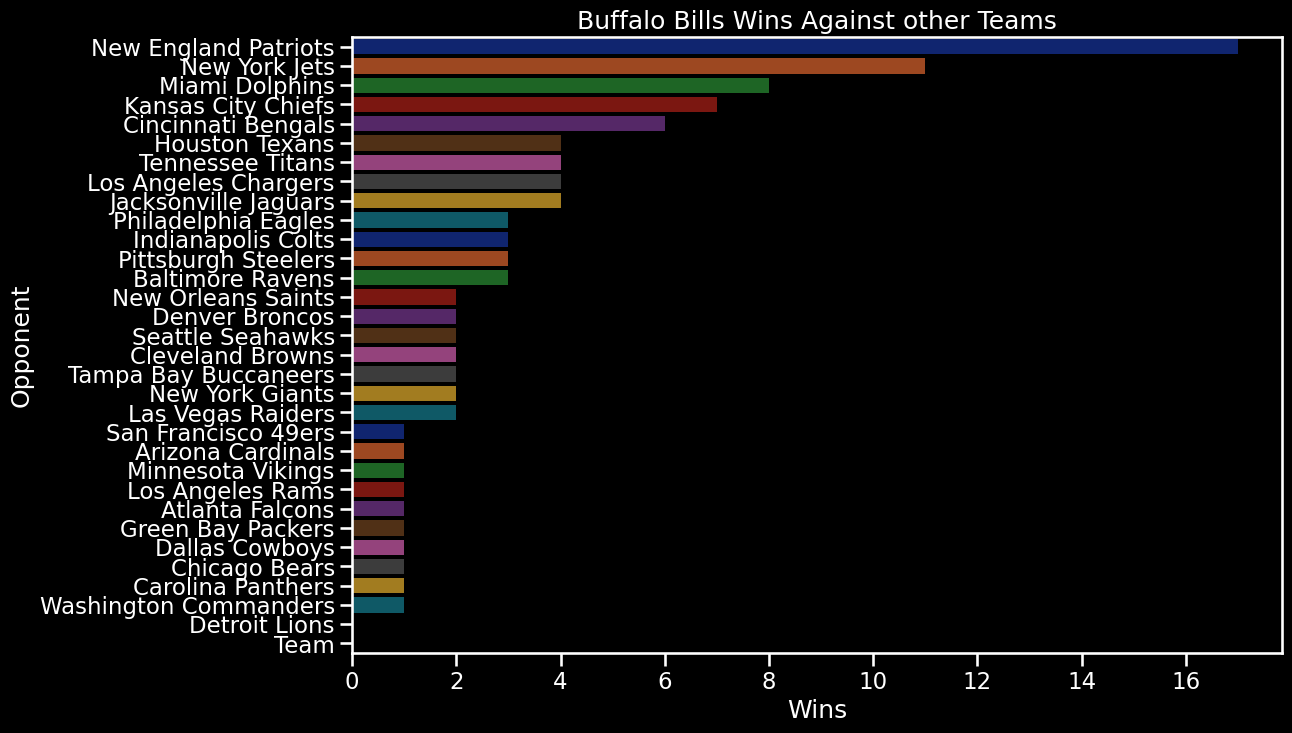

In [ ]:
plot_team_wins("Buffalo Bills")

# Plot of San Francisco 49ers Wins Against Other Teams

<ipython-input-39-c85608a10b7e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_long, x='Wins', y="Opponent", palette='dark')


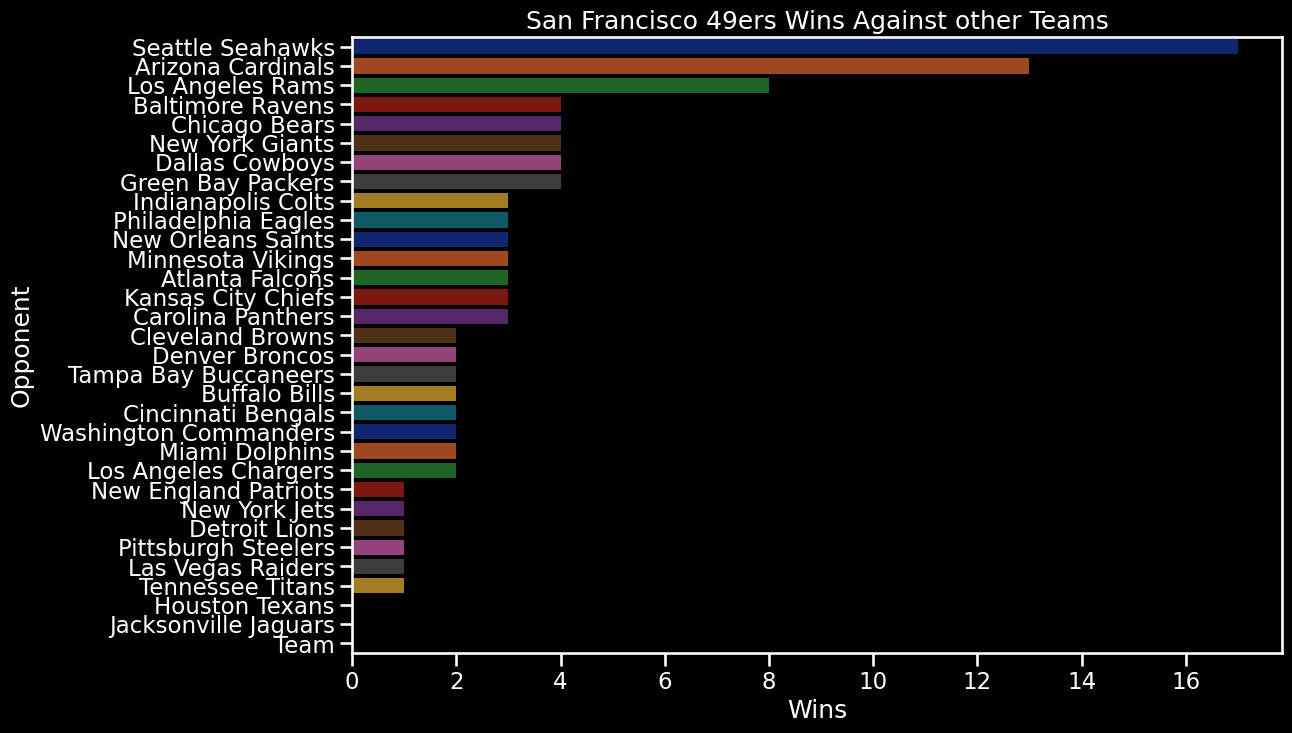

In [ ]:
plot_team_wins("San Francisco 49ers")

# Plot of Kansas City Chiefs Wins Against Other Teams

<ipython-input-39-c85608a10b7e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_long, x='Wins', y="Opponent", palette='dark')


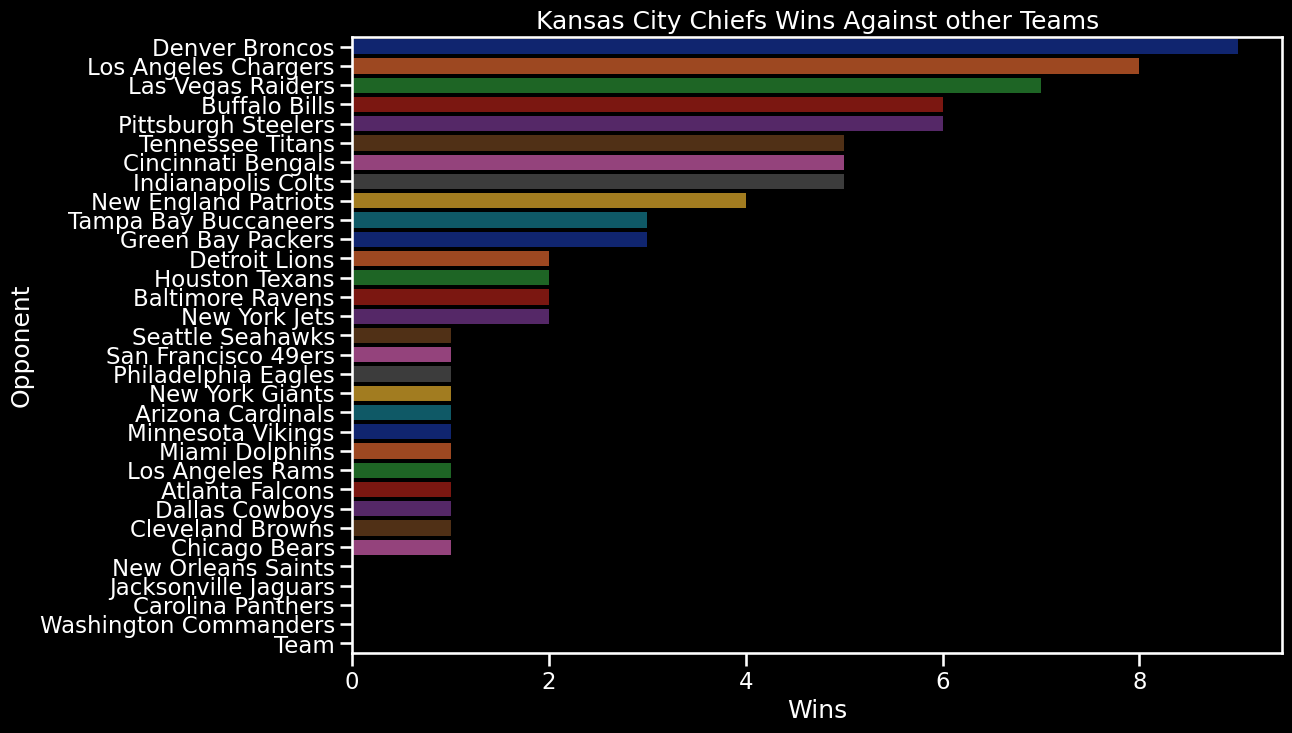

In [ ]:
plot_team_wins("Kansas City Chiefs")

# Bar Plot of LA Chargers Wins vs Other Teams

<ipython-input-39-c85608a10b7e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_long, x='Wins', y="Opponent", palette='dark')


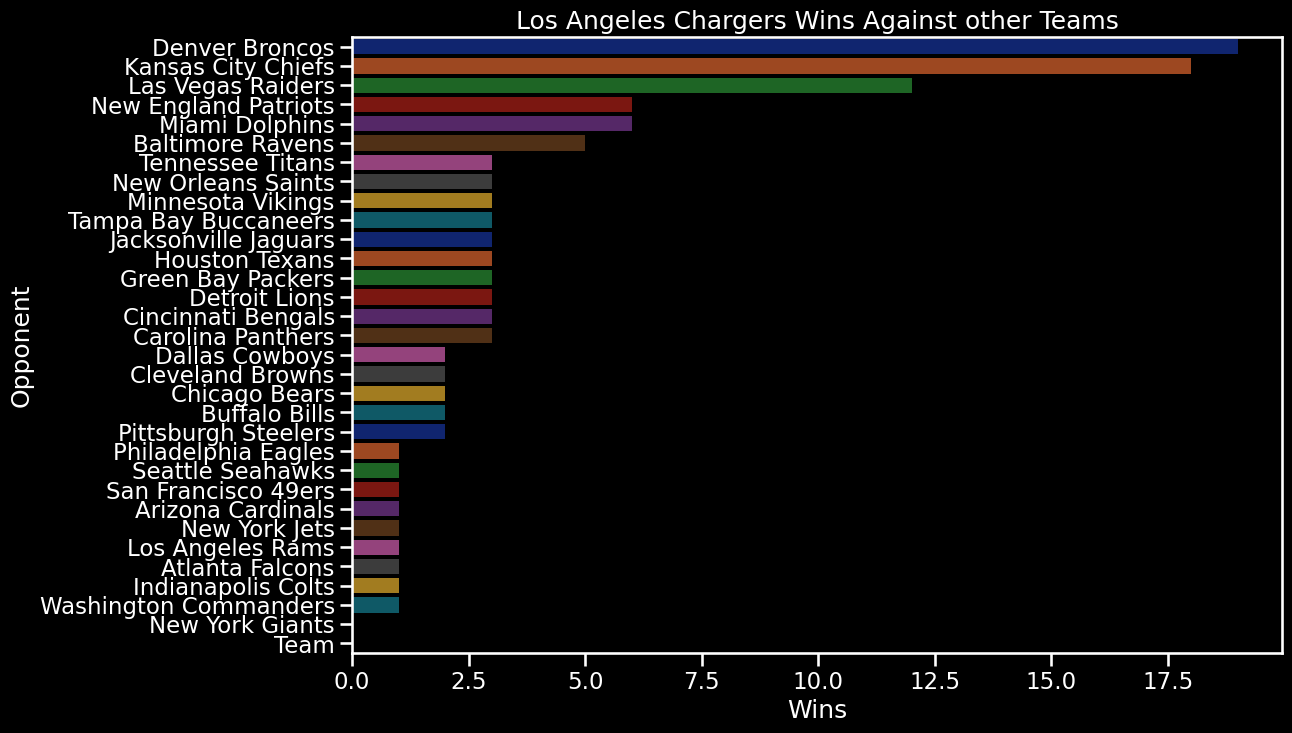

In [ ]:
plot_team_wins("Los Angeles Chargers")

# Machine Learning

<p> Prepare data for training a model, and design a system for tuning the best possible model </p>
<hr>
First step is to add in our feature win loss ratio we manufactured earlier

In [ ]:
def apply_win_feat(x):
  team_home = x['team_home']
  team_away = x['team_away']
  win_ratio = win_percentage_df.loc[team_home, team_away]
  loss_ratio = 1 - win_ratio
  return pd.Series([win_ratio, loss_ratio])

Now it is time to prepare the features we want to use for our model.
Here we will one hot encode the teams into home or away columns. In each row we know what two teams are playing due to the teams column marked with a 1 for either home or away team.

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
team_home_encoded = encoder.fit_transform(df[['team_home']])
team_home_feature_names = encoder.get_feature_names_out(input_features=['team_home'])

encoder = OneHotEncoder(sparse_output=False)
team_away_encoded = encoder.fit_transform(df[['team_away']])
team_away_feature_names = encoder.get_feature_names_out(input_features=['team_away'])

team_home_df = pd.DataFrame(team_home_encoded, columns=team_home_feature_names)
team_away_df = pd.DataFrame(team_away_encoded, columns=team_away_feature_names)

df_encoded = pd.concat([df.reset_index(drop=True), team_home_df, team_away_df], axis=1)
df_encoded[["win_ratio", "loss_ratio"]] = df_encoded.apply(apply_win_feat, axis=1)
df_encoded

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,team_away_New York Jets,team_away_Philadelphia Eagles,team_away_Pittsburgh Steelers,team_away_San Francisco 49ers,team_away_Seattle Seahawks,team_away_Tampa Bay Buccaneers,team_away_Tennessee Titans,team_away_Washington Commanders,win_ratio,loss_ratio
0,2011-09-08,2011,1,False,Green Bay Packers,42.0,34.0,New Orleans Saints,GB,-5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.571429
1,2011-09-11,2011,1,False,Arizona Cardinals,28.0,21.0,Carolina Panthers,ARI,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333
2,2011-09-11,2011,1,False,Baltimore Ravens,35.0,7.0,Pittsburgh Steelers,BAL,-1.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.518519,0.481481
3,2011-09-11,2011,1,False,Chicago Bears,30.0,12.0,Atlanta Falcons,ATL,-1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667
4,2011-09-11,2011,1,False,Cleveland Browns,17.0,27.0,Cincinnati Bengals,CLE,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2024-01-15,2023,Wildcard,True,Tampa Bay Buccaneers,32.0,9.0,Philadelphia Eagles,PHI,-3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.625000
3519,2024-01-20,2023,Division,True,Baltimore Ravens,34.0,10.0,Houston Texans,BAL,-9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.800000
3520,2024-01-20,2023,Division,True,San Francisco 49ers,24.0,21.0,Green Bay Packers,SF,-10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667
3521,2024-01-21,2023,Division,True,Buffalo Bills,24.0,27.0,Kansas City Chiefs,BUF,-2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.461538


### Adding Our Features Here
* One Hot Encoded Team Away vs Team Home
* Weather Temperature
* Weather Wind MPH
* Teams Win / Loss ratio

In [ ]:
ohe = df_encoded.columns[51:].values.tolist()
ohe.insert(0, 'weather_temperature')
ohe.insert(0, 'weather_wind_mph')
ohe.remove("home_score_greater")
ohe

['weather_wind_mph',
 'weather_temperature',
 'team_home_Arizona Cardinals',
 'team_home_Atlanta Falcons',
 'team_home_Baltimore Ravens',
 'team_home_Buffalo Bills',
 'team_home_Carolina Panthers',
 'team_home_Chicago Bears',
 'team_home_Cincinnati Bengals',
 'team_home_Cleveland Browns',
 'team_home_Dallas Cowboys',
 'team_home_Denver Broncos',
 'team_home_Detroit Lions',
 'team_home_Green Bay Packers',
 'team_home_Houston Texans',
 'team_home_Indianapolis Colts',
 'team_home_Jacksonville Jaguars',
 'team_home_Kansas City Chiefs',
 'team_home_Las Vegas Raiders',
 'team_home_Los Angeles Chargers',
 'team_home_Los Angeles Rams',
 'team_home_Miami Dolphins',
 'team_home_Minnesota Vikings',
 'team_home_New England Patriots',
 'team_home_New Orleans Saints',
 'team_home_New York Giants',
 'team_home_New York Jets',
 'team_home_Philadelphia Eagles',
 'team_home_Pittsburgh Steelers',
 'team_home_San Francisco 49ers',
 'team_home_Seattle Seahawks',
 'team_home_Tampa Bay Buccaneers',
 'team_ho

Add our y value to predict (If the home team won)


In [ ]:
df_encoded['home_team_win'] = df_encoded['score_home'] > df_encoded['score_away']
df_encoded['home_team_win'] = df_encoded['home_team_win'].replace({False: 0, True: 1})

Store our features in X and our values to predict in y

In [ ]:
y = df_encoded['home_team_win'].values
X = df_encoded[ohe].values


Split Our Data and Try a Practice Run with KNN Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds_train = knn.predict(X_train)
preds_test = knn.predict(X_test)

print(f"Train score: {(preds_train == y_train).mean()}  Test Score: {(preds_test == y_test).mean()}")

Train score: 0.7258718572587186  Test Score: 0.6035950804162725


# Optimize System Design for KNN Classifier

Lets see if we can optimize our KNN model to perform better, and potentially run the best that it can. We will start by producing graphs that will help us see the optimal value for different hyperparameters.
<hr>
We will start at looking at optimal values of K and training data sizes.

In [ ]:
def optimize_knn_classifer(X, y, max_k, test_size, random_state):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  i = 0
  for k in range(1, max_k+1, 2):
      i +=1
      te_errs = []
      tr_errs = []
      tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
      knn = KNeighborsClassifier(n_neighbors=k)
      for tr_size in tr_sizes:
        X_train1 = X_train[:tr_size,:]
        y_train1 = y_train[:tr_size]

        # train model on a subset of the training data
        knn.fit(X_train1, y_train1)

        # error on subset of training data
        tr_predicted = knn.predict(X_train1)
        err = (tr_predicted != y_train1).mean()
        tr_errs.append(err)

        # error on all test data
        te_predicted = knn.predict(X_test)
        err = (te_predicted != y_test).mean()
        te_errs.append(err)
      plt.subplot(3, 2, i)
      plt.plot(tr_sizes, tr_errs, color="blue", label="Train")
      plt.plot(tr_sizes, te_errs, color="orange", label="Test")
      plt.xlabel("Training Sizes")
      plt.ylabel("Errors")
      plt.title("k={}".format(k))
  plt.legend()
  plt.show()

Print out graphs to show us how the value of k and test sizes affects the model.
<hr>
We found that kNN model will not work well with our data. For all values of k it seems we are overfitting, the model performs well on training data but not test data, and there is a high variance.

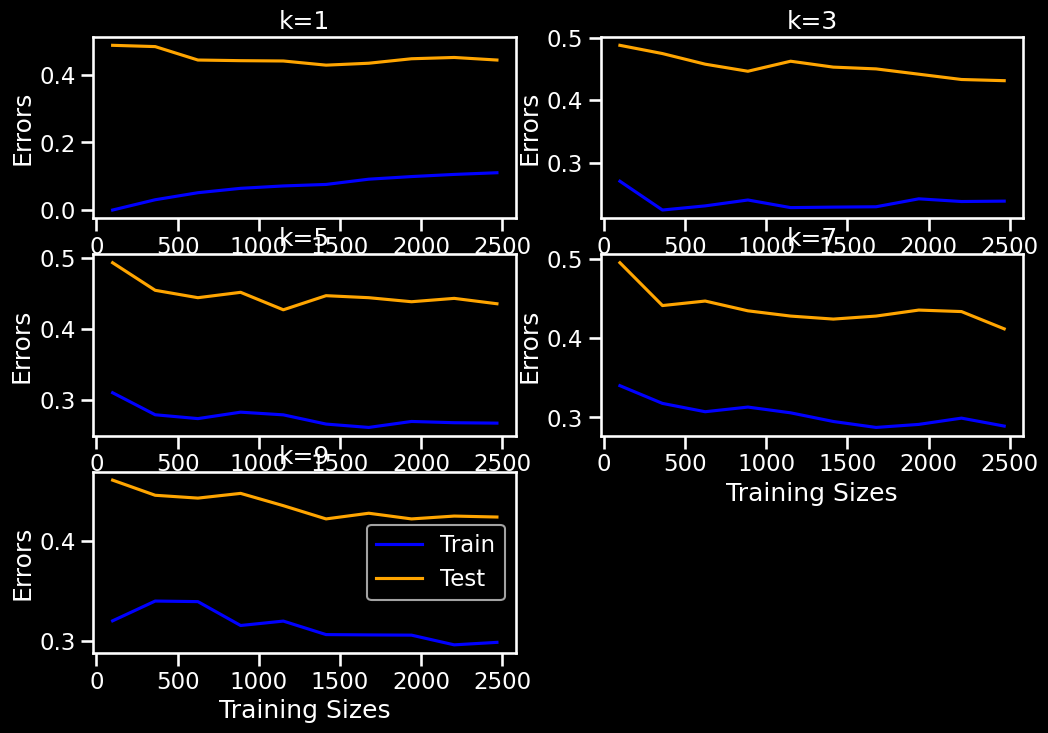

In [ ]:
optimize_knn_classifer(X, y, 9, .3, 0)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
preds_train = knn.predict(X_train)
preds_test = knn.predict(X_test)

print(f"Train score: {(preds_train == y_train).mean()}  Test Score: {(preds_test == y_test).mean()}")

Train score: 0.7100567721005677  Test Score: 0.6035950804162725


# Decision Tree Model
Lets try setting up a decision tree classifier and see how it compares to the KNN model we just optimized.
<hr>
Here we set up an initial decision tree model to see how it works. We will also print out the tree. Being able to visualize the model will help us optimize as we continue.

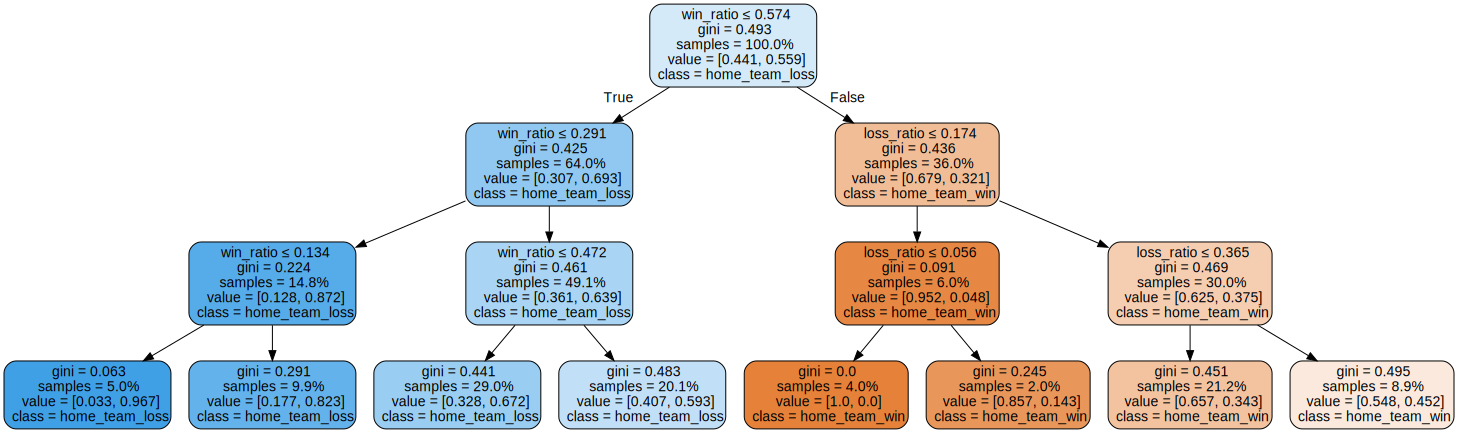

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

target_names = ['home_team_win','home_team_loss']
dot_data = export_graphviz(clf, precision=3,
                          feature_names=ohe,
                          proportion=True,
                          class_names=target_names,
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)
graph

Okay, lets see how accurate the model is predicting.

In [ ]:
y_predict= clf.predict(X_test)
(y_predict == y_test).mean()

0.6783349101229896

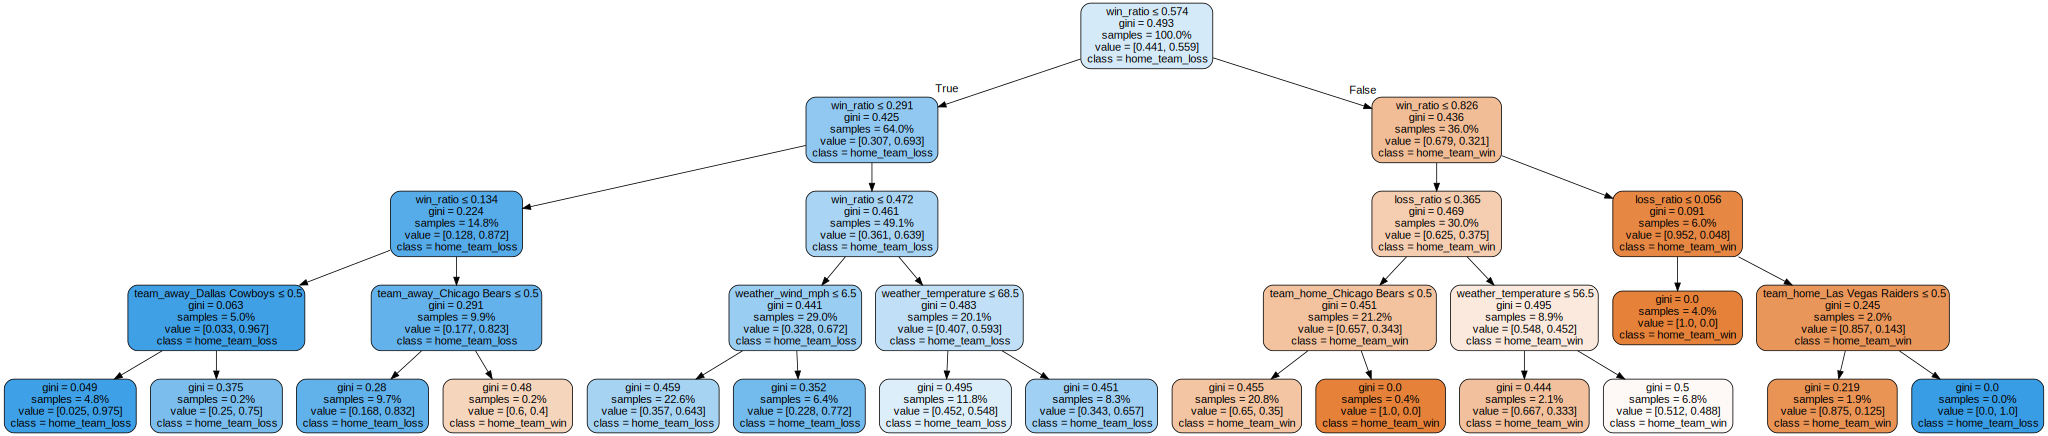

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
target_names = ['home_team_win','home_team_loss']
dot_data = export_graphviz(clf, precision=3,
                          feature_names=ohe,
                          proportion=True,
                          class_names=target_names,
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
y_predict= clf.predict(X_test)
(y_predict == y_test).mean()

0.67360454115421

Lets optimize by cross validating with a grid search over a parameter grid. GridSearchCV is a very convenient function to help us find our optimum hyper parameters. We will find the optimum max depth, minimum samples split, and minimum samples leaf in the cell below.

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 32, 64],
    'min_samples_split': [2, 5, 10, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8, 12, 26, 32]
}

clf = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("Best Params: ", best_params)
print("Best Score: ", best_score)

Best Params:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.6865435941233955


# Feature Importances
- We had one-hot-encoded each team as some of our features but they had 0 importance on our model, along with our weather_wind_mph and weather_temperature.
<br>
- The main features our model was using to determine the outcome of matches are win and loss ratio.
<br>
- We were unable to use other features that we thought were going to be good predictors due to having more than 50% of it missing.
<br>
- We can see that the win ratio weighs heavy on our model when determining the outcome.

In [ ]:
best = grid_search.best_estimator_
features = best.feature_importances_

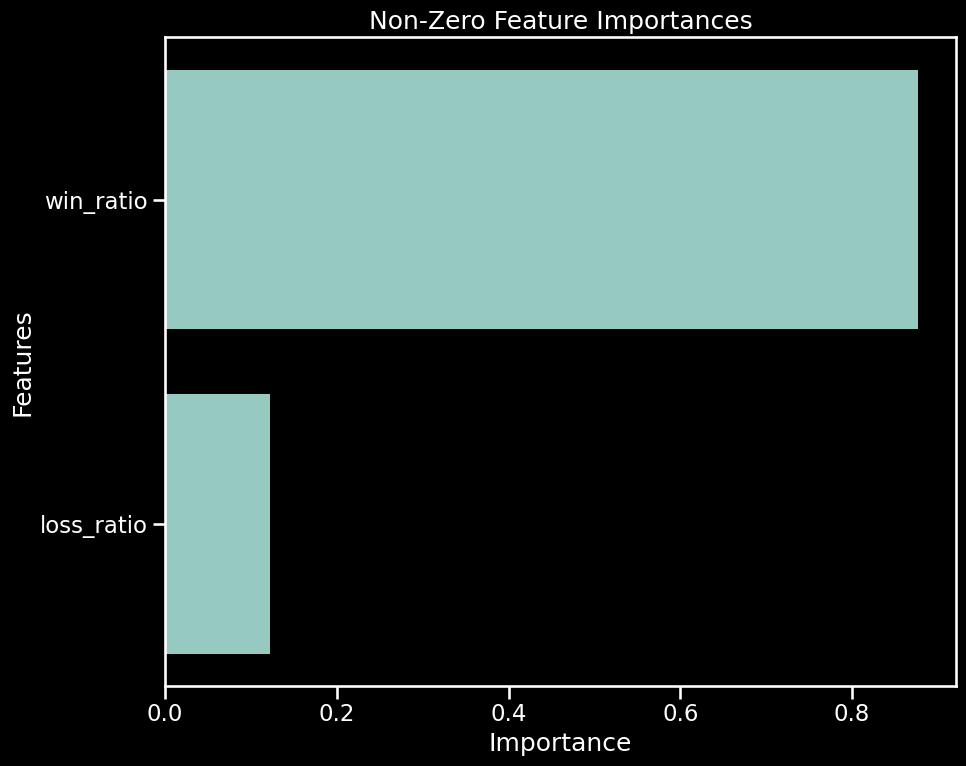

In [ ]:
non_zero_importances = [importance for importance in features if importance > 0]
non_zero_features = [feature for feature, importance in zip(ohe, features) if importance > 0]

df_non_zero = pd.DataFrame({
    'Feature': non_zero_features,
    'Importance': non_zero_importances
})

df_non_zero_sorted = df_non_zero.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_non_zero_sorted)

plt.title('Non-Zero Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()

plt.show()

# Randon Tree Classifier
<hr>
Lets see if the random tree classifier performs with better accuracy than the decision tree.

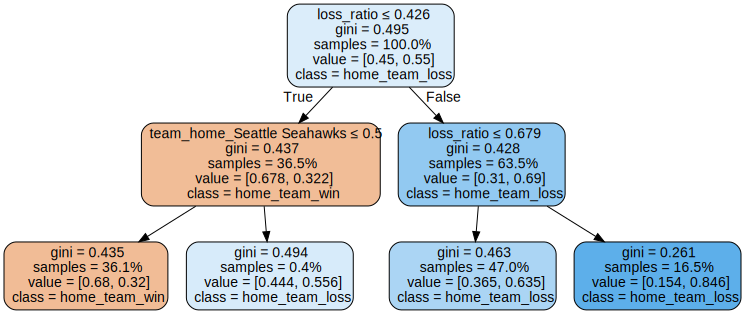

In [ ]:
rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(X_train, y_train)
target_names = ['home_team_win','home_team_loss']
dot_data = export_graphviz(rfclf.estimators_[0], precision=3,
                          feature_names=ohe,
                          proportion=True,
                          class_names=target_names,
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
y_predict= rfclf.predict(X_test)
(y_predict == y_test).mean()

0.6773888363292336

Lets try optimizing the hyperparameters of the random forest classifier with GridSearchCV like we did with the decision tree classifier. After running the cell, it looks like both the random forest and decision tree classifier have equivalent prediction accuracy, and either would be a good choice.

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 32, 64],
    'min_samples_split': [2, 5, 10, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8, 12, 26, 32]
}

grid_search = GridSearchCV(estimator=rfclf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("Best Params: ", best_params)
print("Best Score: ", best_score)

Best Params:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 16}
Best Score:  0.6861395570373899
